In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from tqdm import tqdm
from skimage.transform import resize
import scipy

DSBowl_path = '../dataset/dsbowl/stage1_train/'

IMG_HEIGHT = 128
IMG_WIDTH = 128
IMG_CHANNELS = 3

In [12]:
image_ids = next(os.walk(MICCAI_path))[1]

In [18]:
mask_path = MICCAI_path + image_ids[0] + '/masks/'
image_path = MICCAI_path + image_ids[0] + '/images/'
mask_files = next(os.walk(mask_path))[2]
image_files = next(os.walk(image_path))[2]

../dataset/MICCAI/MICCAI/hnsc_0009/masks/hnsc_sample_0009.png
(540, 540)


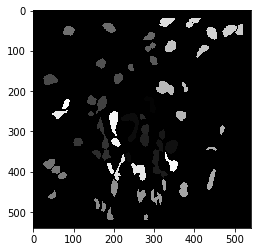

In [100]:
mask_file = mask_path + mask_files[0]
mask = imread(mask_file)
mask = np.lib.pad(mask, ((20,20), (20,20)), 'constant')
print(mask_file)
print(mask.shape)
plt.imshow(mask, cmap='gray')

(500, 500, 3)
../dataset/MICCAI/MICCAI/hnsc_0009/images/hnsc_sample_0009.png
(540, 540, 3)


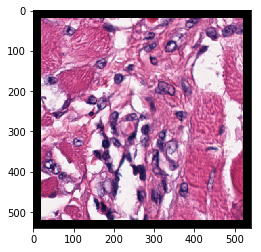

In [98]:
image_file = image_path + image_files[0]
image = imread(image_file)[:,:,:3]
print(image.shape)
image = np.lib.pad(image, ((20,20), (20,20), (0,0)), 'constant')
print(image_file)
print(image.shape)
plt.imshow(image, cmap='gray')

## Start Program

In [27]:
from scipy import ndimage
from scipy import stats
from skimage.transform import resize
from skimage.io import imread, imsave
import os
import numpy as np
import matplotlib.pyplot as plt

ROOT_PATH = '../dataset/'
MICCAI_path = ROOT_PATH + 'MICCAI/MICCAI/'
SAVED_PATH = ROOT_PATH + 'nuclei_shape_library/MICCAI/'

IMG_SIZE = 64
MINIMUM_SIZE = 20

def _make_folder():
    if not os.path.isdir(ROOT_PATH+'nuclei_shape_library/'):
        os.mkdir(ROOT_PATH+'nuclei_shape_library/')
    if not os.path.isdir(SAVED_PATH):
        os.mkdir(SAVED_PATH)
        os.mkdir(SAVED_PATH+'/shape/')
        os.mkdir(SAVED_PATH+'/image/')
        
def _square_patch(label_coords):
    y_start = label_coords[0].start
    y_stop = label_coords[0].stop
    x_start = label_coords[1].start
    x_stop = label_coords[1].stop
    y_len = y_stop - y_start
    x_len = x_stop - x_start
    
    if (y_len < IMG_SIZE) and (x_len < IMG_SIZE):
        padding = (IMG_SIZE-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
        
        padding = (IMG_SIZE-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    elif y_len > x_len:
        padding = (y_len-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
    elif x_len > y_len:
        padding = (x_len-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    return (int(y_start), int(y_stop), int(x_start), int(x_stop))

def _mask_to_nuclei_images(image, mask):
    for label_coords in ndimage.find_objects(mask):
        mask_crop = mask[label_coords]
        
        if np.product(mask_crop.shape) < MINIMUM_SIZE:
            continue
        label = stats.mode(mask_crop[mask_crop>0], axis=None)[0][0]

        (y_start,y_stop,x_start,x_stop) = _square_patch(label_coords)

        print((y_start,y_stop,x_start,x_stop))
        cell = image[y_start:y_stop ,x_start:x_stop]

        shape = mask[y_start:y_stop ,x_start:x_stop].copy()
        shape[shape!=label] = 0
        shape[shape==label] = 255

        cell = resize(cell, (IMG_SIZE,IMG_SIZE))
        shape = resize(shape, (IMG_SIZE,IMG_SIZE))

        scipy.misc.imsave(f"{SAVED_PATH}shape/{image_id}_{label}.png", shape)#, cmap='gray')
        imsave(f"{SAVED_PATH}image/{image_id}_{label}.png", cell)

        
_make_folder()
image_ids = next(os.walk(MICCAI_path))[1]

if not os.path.isdir(ROOT_PATH+'nuclei_shape_library/'):
    os.mkdir(ROOT_PATH+'nuclei_shape_library/')
    
if not os.path.isdir(SAVED_PATH):
    os.mkdir(SAVED_PATH)
    os.mkdir(SAVED_PATH+'/shape/')
    os.mkdir(SAVED_PATH+'/image/')
    
for image_id in image_ids:
    mask_path = MICCAI_path + image_id + '/masks/'
    image_path = MICCAI_path + image_id + '/images/'
    
    mask_files = next(os.walk(mask_path))[2]
    image_files = next(os.walk(image_path))[2]
    
    
    mask_file = mask_path + mask_files[0]
    mask = imread(mask_file)
    mask = np.lib.pad(mask, ((20,20), (20,20)), 'constant')
    
    image_file = image_path + image_files[0]
    image = imread(image_file)[:,:,:3]
    image = np.lib.pad(image, ((20,20), (20,20), (0,0)), 'constant')

    _mask_to_nuclei_images(image, mask)
    

/home/aiy/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/aiy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:89: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/aiy/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## dsbowl nuclei

In [ ]:
from scipy import ndimage
from scipy import stats
from skimage.transform import resize
from skimage.io import imread, imsave
import os
import numpy as np
import matplotlib.pyplot as plt

ROOT_PATH = '../dataset/'
MICCAI_path = ROOT_PATH + 'dsbowl/stage1_train/'
SAVED_PATH = ROOT_PATH + 'nuclei_shape_library/dsbowl/'

IMG_SIZE = 64
MINIMUM_SIZE = 20

def _make_folder():
    if not os.path.isdir(ROOT_PATH+'nuclei_shape_library/'):
        os.mkdir(ROOT_PATH+'nuclei_shape_library/')
    if not os.path.isdir(SAVED_PATH):
        os.mkdir(SAVED_PATH)
        os.mkdir(SAVED_PATH+'/shape/')
        os.mkdir(SAVED_PATH+'/image/')

def _square_patch(label_coords):
    y_start = label_coords[0].start
    y_stop = label_coords[0].stop
    x_start = label_coords[1].start
    x_stop = label_coords[1].stop
    y_len = y_stop - y_start
    x_len = x_stop - x_start
    
    if (y_len < IMG_SIZE) and (x_len < IMG_SIZE):
        padding = (IMG_SIZE-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
        
        padding = (IMG_SIZE-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    elif y_len > x_len:
        padding = (y_len-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
    elif x_len > y_len:
        padding = (x_len-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    return (int(y_start), int(y_stop), int(x_start), int(x_stop))

def _mask_to_nuclei_images(image, mask):
    for label_coords in ndimage.find_objects(mask):
        mask_crop = mask[label_coords]
        
        if np.product(mask_crop.shape) < MINIMUM_SIZE:
            continue
        label = stats.mode(mask_crop[mask_crop>0], axis=None)[0][0]

        (y_start,y_stop,x_start,x_stop) = _square_patch(label_coords)

        print((y_start,y_stop,x_start,x_stop))
        cell = image[y_start:y_stop ,x_start:x_stop]

        shape = mask[y_start:y_stop ,x_start:x_stop].copy()
        shape[shape!=label] = 0
        shape[shape==label] = 255

        cell = resize(cell, (IMG_SIZE,IMG_SIZE))
        shape = resize(shape, (IMG_SIZE,IMG_SIZE))

        scipy.misc.imsave(f"{SAVED_PATH}shape/{image_id}_{label}.png", shape)#, cmap='gray')
        imsave(f"{SAVED_PATH}image/{image_id}_{label}.png", cell)


_make_folder()
image_ids = next(os.walk(MICCAI_path))[1]

for image_id in image_ids:
    mask_path = MICCAI_path + image_id + '/masks/'
    image_path = MICCAI_path + image_id + '/images/'
    
    mask_files = next(os.walk(mask_path))[2]
    image_files = next(os.walk(image_path))[2]
    
    image_file = image_path + image_files[0]
    image = imread(image_file)[:,:,:3]
    image = np.lib.pad(image, ((20,20), (20,20), (0,0)), 'constant')
    
    for mask_file in mask_files:
    
        mask_file = mask_path + mask_file
        mask = imread(mask_file)
        mask = np.lib.pad(mask, ((20,20), (20,20)), 'constant')
        
        mask[mask>0] = 1
        
    _mask_to_nuclei_images(image, mask)


## John Dataset nuclei

In [ ]:
from scipy import ndimage
from scipy import stats
from skimage.transform import resize
from skimage.io import imread, imsave
import os
import numpy as np
import matplotlib.pyplot as plt

ROOT_PATH = '../dataset/'
MICCAI_path = ROOT_PATH + 'John Dataset/'
SAVED_PATH = ROOT_PATH + 'nuclei_shape_library/John/'

IMG_SIZE = 64
MINIMUM_SIZE = 20
PADDING_SIZE = 40

def _make_folder():
    if not os.path.isdir(ROOT_PATH+'nuclei_shape_library/'):
        os.mkdir(ROOT_PATH+'nuclei_shape_library/')
    if not os.path.isdir(SAVED_PATH):
        os.mkdir(SAVED_PATH)
        os.mkdir(SAVED_PATH+'/shape/')
        os.mkdir(SAVED_PATH+'/image/')

def _square_patch(label_coords):
    y_start = label_coords[0].start
    y_stop = label_coords[0].stop
    x_start = label_coords[1].start
    x_stop = label_coords[1].stop
    y_len = y_stop - y_start
    x_len = x_stop - x_start
    
    if (y_len < IMG_SIZE) and (x_len < IMG_SIZE):
        padding = (IMG_SIZE-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
        
        padding = (IMG_SIZE-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    elif y_len > x_len:
        padding = (y_len-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
    elif x_len > y_len:
        padding = (x_len-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    return (int(y_start), int(y_stop), int(x_start), int(x_stop))

def _mask_to_nuclei_images(image, mask):
    for label_coords in ndimage.find_objects(mask):
        mask_crop = mask[label_coords]
        
        if np.product(mask_crop.shape) < MINIMUM_SIZE:
            continue
        label = stats.mode(mask_crop[mask_crop>0], axis=None)[0][0]

        (y_start,y_stop,x_start,x_stop) = _square_patch(label_coords)

        print((y_start,y_stop,x_start,x_stop))
        cell = image[y_start:y_stop ,x_start:x_stop]

        shape = mask[y_start:y_stop ,x_start:x_stop].copy()
        shape[shape!=label] = 0
        shape[shape==label] = 255

        cell = resize(cell, (IMG_SIZE,IMG_SIZE))
        shape = resize(shape, (IMG_SIZE,IMG_SIZE))

        scipy.misc.imsave(f"{SAVED_PATH}shape/{image_id}_{label}.png", shape)#, cmap='gray')
        imsave(f"{SAVED_PATH}image/{image_id}_{label}.png", cell)


_make_folder()
image_file_names = next(os.walk(f'{MICCAI_path}png_image'))[2]

for image_file_name in image_file_names:
    image_id = image_file_name.split('.')[0]
    
    mask_file_path = f'{MICCAI_path}mask2/{image_file_name}'
    image_file_path = f'{MICCAI_path}png_image/{image_file_name}'
    
    image = imread(image_file_path)[:,:,:3]
    image = np.lib.pad(image, ((PADDING_SIZE,PADDING_SIZE), (PADDING_SIZE,PADDING_SIZE), 
                               (0,0)), 'constant')
    
    mask = imread(mask_file_path)
    mask = np.lib.pad(mask, ((PADDING_SIZE,PADDING_SIZE), (PADDING_SIZE,PADDING_SIZE)), 
                      'constant')
    
    _mask_to_nuclei_images(image, mask)



In [77]:
np.unique(mask)

array([  0,   2,   5,   7,   9,  11,  14,  16,  18,  20,  23,  25,  27,
        29,  32,  34,  36,  38,  41,  43,  45,  47,  50,  52,  54,  56,
        59,  61,  63,  65,  68,  70,  72,  74,  77,  79,  81,  83,  86,
        88,  90,  93,  95,  97,  99, 102, 104, 106, 108, 111, 113, 115,
       117, 120, 122, 124, 126, 129, 131, 133, 135, 138, 140, 142, 144,
       147, 149, 151, 153, 156, 158, 160, 162, 165, 167, 169, 172, 174,
       176, 178, 181, 183, 185, 187, 190, 192, 194, 196, 199, 201, 203,
       205, 208, 210, 212, 214, 217, 219, 221, 223, 226, 228, 230, 232,
       235, 237, 239, 241, 244, 246, 248, 250, 253, 255], dtype=uint8)

# Nuclei library for 3 datasets - All in One just run this cell

In [ ]:
from scipy import ndimage
from scipy import stats
from skimage.transform import resize
from skimage.io import imread, imsave
import os
import numpy as np
import matplotlib.pyplot as plt

ROOT_PATH = '../dataset/'
FOLDER_NAME = 'nuclei_shape_library/'
SAVED_PATH = ROOT_PATH + FOLDER_NAME

SEPARATE_FOLDER = False
REMOVE_BOUNDARY = False
REMOVE_INCOMPLETE_SHAPE = True


IMG_SIZE = 64
MINIMUM_SIZE = 800  # rows * columns
PADDING_SIZE = 60

def _make_folder():
    if not os.path.isdir(ROOT_PATH+'nuclei_shape_library/'):
        os.mkdir(ROOT_PATH+'nuclei_shape_library/')
        if not SEPARATE_FOLDER:
            os.mkdir(SAVED_PATH+'/shape/')
            os.mkdir(SAVED_PATH+'/image/')
    if not os.path.isdir(SAVED_PATH):
        os.mkdir(SAVED_PATH)
        os.mkdir(SAVED_PATH+'/shape/')
        os.mkdir(SAVED_PATH+'/image/')
        
def _square_patch(label_coords):
    y_start = label_coords[0].start
    y_stop = label_coords[0].stop
    x_start = label_coords[1].start
    x_stop = label_coords[1].stop
    y_len = y_stop - y_start
    x_len = x_stop - x_start
    
    if (y_len < IMG_SIZE) and (x_len < IMG_SIZE):
        padding = (IMG_SIZE-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
        
        padding = (IMG_SIZE-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    elif y_len > x_len:
        padding = (y_len-x_len)/2
        x_start = x_start - padding
        x_stop = x_stop + padding
    elif x_len > y_len:
        padding = (x_len-y_len)/2
        y_start = y_start - padding
        y_stop = y_stop + padding
    return (int(y_start), int(y_stop), int(x_start), int(x_stop))

def _is_incomplete_shape(label_coords, max_size):
    
    return ((label_coords[0].start < PADDING_SIZE+2) or 
            (label_coords[1].start < PADDING_SIZE+2) or 
            (label_coords[0].stop > max_size-PADDING_SIZE-3) or 
            (label_coords[1].stop > max_size-PADDING_SIZE-3))

def _mask_to_nuclei_images(image, mask):
    for label_coords in ndimage.find_objects(mask):
        
        if REMOVE_INCOMPLETE_SHAPE and (_is_incomplete_shape(label_coords, mask.shape[0])):
            continue
        
        mask_crop = mask[label_coords]
        
        if np.product(mask_crop.shape) < MINIMUM_SIZE:
            continue
        label = stats.mode(mask_crop[mask_crop>0], axis=None)[0][0]

        (y_start,y_stop,x_start,x_stop) = _square_patch(label_coords)
        
        cell = image[y_start:y_stop ,x_start:x_stop]
        
        if REMOVE_BOUNDARY and (y_start < 0 or y_stop < 0 or x_start < 0 or y_stop < 0):
            continue
            
        shape = mask[y_start:y_stop ,x_start:x_stop].copy()
        shape[shape!=label] = 0
        shape[shape==label] = 255

        cell = resize(cell, (IMG_SIZE,IMG_SIZE))
        shape = resize(shape, (IMG_SIZE,IMG_SIZE))

        scipy.misc.imsave(f"{SAVED_PATH}shape/{image_id}_{label}.png", shape)#, cmap='gray')
        imsave(f"{SAVED_PATH}image/{image_id}_{label}.png", cell)

# MICCAI

MICCAI_path = ROOT_PATH + 'MICCAI/MICCAI/'

if SEPARATE_FOLDER:
    SAVED_PATH = ROOT_PATH + f'{FOLDER_NAME}MICCAI/'

_make_folder()
image_ids = next(os.walk(MICCAI_path))[1]
    
for image_id in image_ids:
    mask_path = MICCAI_path + image_id + '/masks/'
    image_path = MICCAI_path + image_id + '/images/'
    
    mask_files = next(os.walk(mask_path))[2]
    image_files = next(os.walk(image_path))[2]
    
    
    mask_file = mask_path + mask_files[0]
    mask = imread(mask_file)
    mask = np.lib.pad(mask, 
                      ((PADDING_SIZE,PADDING_SIZE), (PADDING_SIZE,PADDING_SIZE)), 
                      'constant')
    
    image_file = image_path + image_files[0]
    image = imread(image_file)[:,:,:3]
    image = np.lib.pad(image, ((PADDING_SIZE,PADDING_SIZE), 
                               (PADDING_SIZE,PADDING_SIZE), 
                               (0,0)), 'constant')

    _mask_to_nuclei_images(image, mask)

# DSBowl    

MICCAI_path = ROOT_PATH + 'dsbowl/stage1_train/'

if SEPARATE_FOLDER:
    SAVED_PATH = ROOT_PATH + f'{FOLDER_NAME}dsbowl/'


_make_folder()
image_ids = next(os.walk(MICCAI_path))[1]

for image_id in image_ids:
    mask_path = MICCAI_path + image_id + '/masks/'
    image_path = MICCAI_path + image_id + '/images/'
    
    mask_files = next(os.walk(mask_path))[2]
    image_files = next(os.walk(image_path))[2]
    
    image_file = image_path + image_files[0]
    image = imread(image_file)[:,:,:3]
    image = np.lib.pad(image, 
                       ((PADDING_SIZE,PADDING_SIZE),(PADDING_SIZE,PADDING_SIZE),(0,0)), 
                       'constant')
    
    for mask_file in mask_files:
    
        mask_file = mask_path + mask_file
        mask = imread(mask_file)
        mask = np.lib.pad(mask, ((PADDING_SIZE,PADDING_SIZE), 
                                 (PADDING_SIZE,PADDING_SIZE)), 
                                  'constant')
        
        mask[mask>0] = 1
        
        _mask_to_nuclei_images(image, mask)

# John Dataset

MICCAI_path = ROOT_PATH + 'John Dataset/'

if SEPARATE_FOLDER:
    SAVED_PATH = ROOT_PATH + f'{FOLDER_NAME}John/'


_make_folder()
image_file_names = next(os.walk(f'{MICCAI_path}png_image'))[2]

for image_file_name in image_file_names:
    image_id = image_file_name.split('.')[0]
    
    mask_file_path = f'{MICCAI_path}mask2/{image_file_name}'
    image_file_path = f'{MICCAI_path}png_image/{image_file_name}'
    
    image = imread(image_file_path)[:,:,:3]
    image = np.lib.pad(image, ((PADDING_SIZE,PADDING_SIZE), (PADDING_SIZE,PADDING_SIZE), 
                               (0,0)), 'constant')
    
    mask = imread(mask_file_path)
    mask = np.lib.pad(mask, ((PADDING_SIZE,PADDING_SIZE), (PADDING_SIZE,PADDING_SIZE)), 
                      'constant')
    
    _mask_to_nuclei_images(image, mask)


In [ ]:
# ROOT_PATH = '../dataset/'
# MICCAI_path = ROOT_PATH + 'MICCAI/MICCAI/'
# SAVED_PATH = ROOT_PATH + 'nuclei_shape_library/MICCAI/'

# shape_files = next(os.walk(f'{SAVED_PATH}gbm_0000/shape'))[2]
# file = f'{SAVED_PATH}gbm_0000/shape/' + shape_files[1]
# np.max(imread(file))

# show library Sample

In [12]:
import random
import os
import matplotlib.pyplot as plt
from skimage.io import imread, imsave


In [5]:
ROOT_PATH = '../dataset/'
SAVED_PATH = ROOT_PATH + 'nuclei_shape_library/'

In [6]:
shapes = next(os.walk(SAVED_PATH+'shape'))[2]

In [8]:
K = 100
sample_shapes = random.sample(shapes, K)

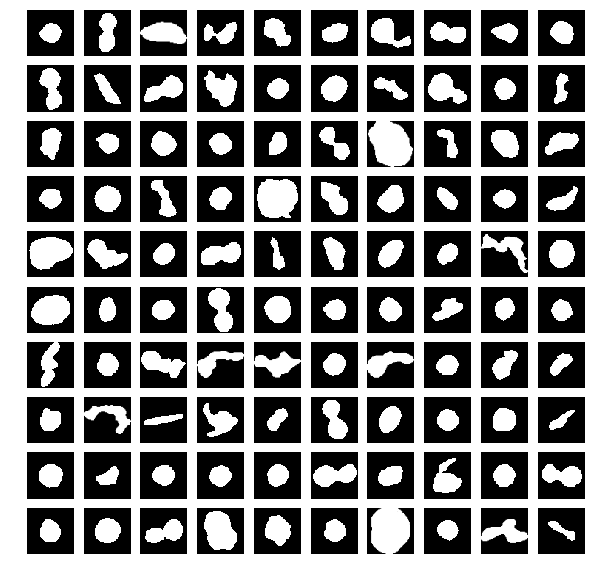

In [13]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for k, file_name in enumerate(sample_shapes):
    shape = imread(SAVED_PATH+'shape/'+file_name)
    ax[k//10, k%10].imshow(shape, cmap='gray')
    ax[k//10, k%10].axis('off')
    
plt.show()

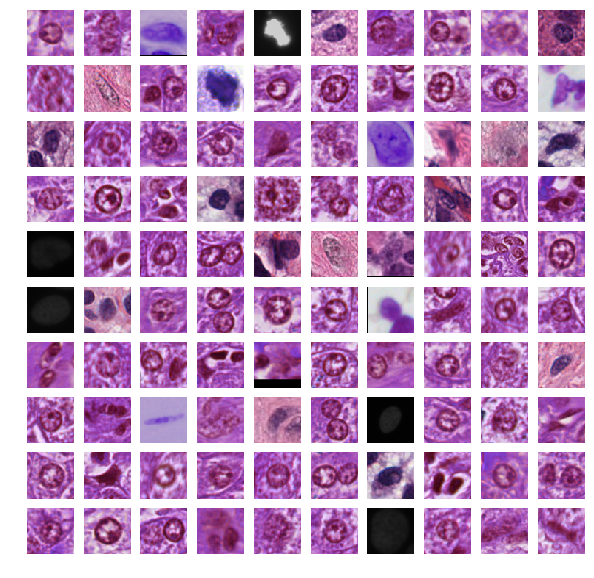

In [14]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for k, file_name in enumerate(sample_shapes):
    shape = imread(SAVED_PATH+'image/'+file_name)
    ax[k//10, k%10].imshow(shape, cmap='gray')
    ax[k//10, k%10].axis('off')
    
plt.show()